# Wealth and Life Expectancy (Gapminder)

The following is a basic visualization creation based off Gapminder data. 

In [1]:
import pandas as pd
from plotnine import *
import plotnine as plt

import numpy as np

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
# Read in the Data

gapminder = pd.read_csv('gapminder.csv')
gapminder = gapminder[gapminder['country'] != 'Kuwait']

/anaconda/lib/python3.6/site-packages/plotnine/layer.py:458: UserWarning: geom_point : Removed 63 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


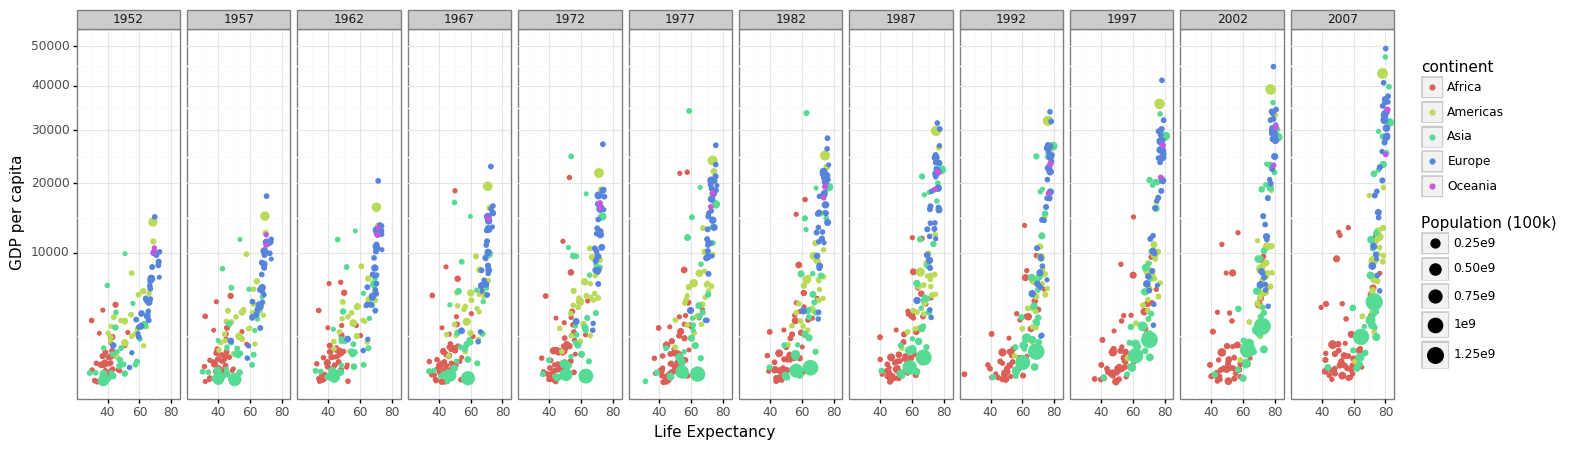

<ggplot: (-9223372036566508116)>

In [37]:
# Create plot 1

plt.options.figure_size = (17, 4.8)

(ggplot(gapminder, aes(x = 'lifeExp', 
                      y = 'gdpPercap', 
                      size = 'pop',
                      color = 'continent')) +
  geom_point() +
  scale_y_continuous(trans = "sqrt" ,limits = [500,50000]) +
  facet_grid('. ~ year') +
  labs(x = 'Life Expectancy',
       y = 'GDP per capita',
       size = "Population (100k)",
       color = 'continent') +
  theme_bw())

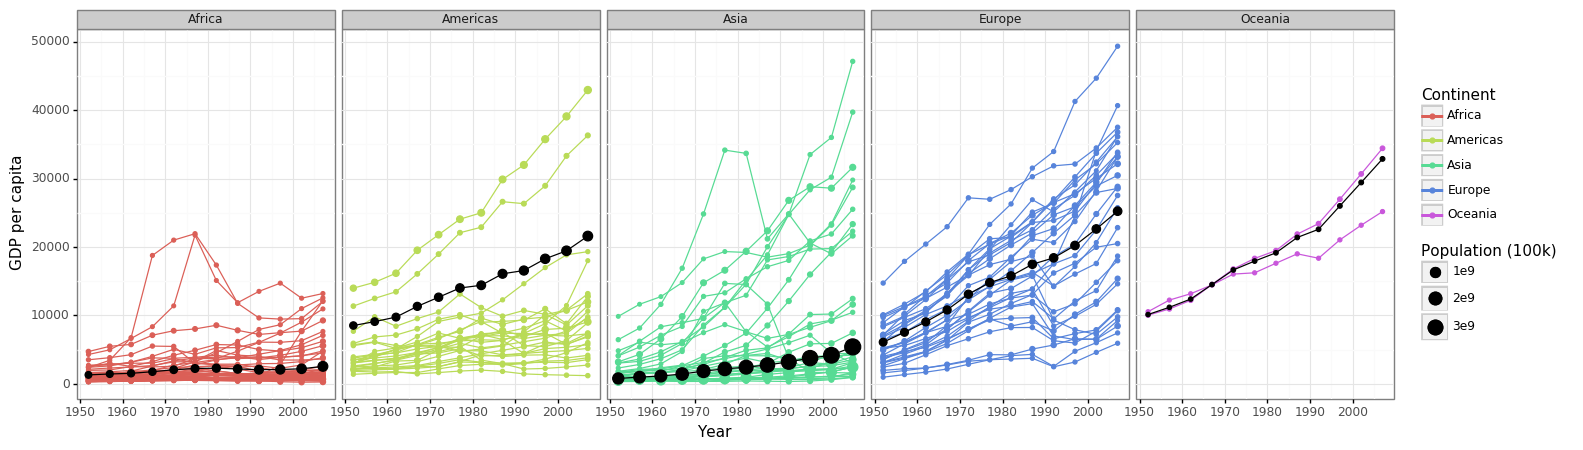

<ggplot: (-9223372036565717844)>

In [60]:
# Find the weighted average

weighted = pd.DataFrame(gapminder.groupby(['continent', 'year'])
                                 .apply(lambda x: np.average(x['gdpPercap'], weights=x['pop']))).reset_index()
weighted.columns = ['continent', 'year', 'gdp']

weighted_pop = pd.DataFrame(gapminder.groupby(['continent', 'year'])['pop'].sum()).reset_index()
weighted = pd.merge(weighted, weighted_pop, on=['continent', 'year'])

# Build plot 2

(ggplot() +
  geom_point(data=gapminder, mapping=aes(x = 'year',
        y = 'gdpPercap',
        group = 'country',
        color = 'continent',
        size = 'pop')) +
  geom_line(data=gapminder, mapping=aes(x = 'year',
        y = 'gdpPercap',
        group = 'country',
        color = 'continent')) +
  geom_point(data=weighted, 
             mapping=aes(x = 'year', y = 'gdp', size = 'pop')) +
  geom_line(data=weighted, 
            mapping=aes(x = 'year', y = 'gdp')) +
  facet_grid('. ~ continent') +
  coord_cartesian(ylim = [0,50000]) +
  labs(color = "Continent",
       size = "Population (100k)",
       x = "Year",
       y = "GDP per capita") +
   theme_bw())